## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

In [2]:
import pandas as pd

In [3]:
# Read in the customer data
customer_data = pd.read_csv('maven_music_customers.csv')
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [4]:
# Read in the listening history
listening_history =pd.read_excel('maven_music_listening_history.xlsx')
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [5]:
# Hint: Where might you find listening history data beyond the ID's?


In [6]:
# Read in the audio data
audio=pd.read_excel('maven_music_listening_history.xlsx', sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [7]:
# Read in the session data
session=pd.read_excel('maven_music_listening_history.xlsx', sheet_name=2)
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [8]:
# Check the data types
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [9]:
#CUSTOMER DATA
customer_data.dtypes
customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'])
customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'])
customer_data['Subscription Rate'] = pd.to_numeric(customer_data['Subscription Rate'].str.replace('$',''))

C:\Users\kiki_\AppData\Local\Temp\ipykernel_17956\3594188380.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'])
C:\Users\kiki_\AppData\Local\Temp\ipykernel_17956\3594188380.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'])


In [10]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [41]:
#LISTENING STORIES
listening_history.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [43]:
listening_history.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [44]:
#AUDIO
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [45]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [46]:
#SESSION
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [47]:
session.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [11]:
# Look for NaN values in the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [12]:
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [13]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [14]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [15]:
#FIXING CUSTOMER DATA
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [17]:
customer_data[customer_data['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [18]:
customer_data[['Subscription Rate', 'Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [22]:
customer_data['Subscription Plan'] = customer_data['Subscription Plan'].fillna('Basic (Ads)')
customer_data.head()


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [24]:
customer_data['Subscription Plan'].value_counts()

Subscription Plan
Basic (Ads)         17
Premium (No Ads)    13
Name: count, dtype: int64

In [26]:
#FIXING DISCOUNT
customer_data['Discount?'].value_counts(dropna=False)

Discount?
NaN    23
Yes     7
Name: count, dtype: int64

In [27]:
customer_data['Discount?'] = customer_data['Discount?'].fillna('No')

In [28]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT


In [31]:
import numpy as np
customer_data['Discount?'] = np.where(customer_data['Discount?'] == 'Yes',1,0)

In [32]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [33]:
customer_data['Discount?'].value_counts()

Discount?
0    23
1     7
Name: count, dtype: int64

#### ii. Inconsistent Text & Typos

In [34]:
customer_data.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [41]:
#FIX SUBSCRIPTION RATE
customer_data['Subscription Rate'].value_counts()

Subscription Rate
2.99    17
7.99     7
9.99     6
Name: count, dtype: int64

In [38]:
customer_data[customer_data['Subscription Rate'] > 9.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [39]:
customer_data.iloc[15,5] = 9.99

In [42]:
customer_data['Subscription Rate'].value_counts()

Subscription Rate
2.99    17
7.99     7
9.99     6
Name: count, dtype: int64

In [45]:
# FIX AUDIO DATA
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [46]:
audio.Genre.value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [47]:
audio['Genre'] = audio['Genre'].str.replace('Pop Music', 'Pop')

In [48]:
audio.Genre.value_counts()

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [49]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


#### iii. Duplicate Rows

In [51]:
# Look for duplicate rows
customer_data[customer_data.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [50]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [52]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [53]:
session[session.duplicated()]

,Session ID,Session Log In Time


#### iv. Outliers

In [54]:
# Look for outliers
customer_data.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [55]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [56]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [57]:
session.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [58]:
# Create a 'Cancelled' column
customer_data['Cancelled'] = np.where(customer_data['Cancellation Date'].notna(),1,0)

In [62]:
# Create an updated 'Email' column without the Email: portion
customer_data['Email'] = customer_data.Email.str[6:]
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [73]:
# How long were customers members before they cancelled?
(customer_data['Cancellation Date'] - customer_data['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [70]:
# Cancellation rate for those who had a discount
discount_yes = customer_data[customer_data['Discount?'] == 1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [71]:
discount_yes['Cancelled'].sum() / discount_yes['Cancelled'].count()

0.8571428571428571

In [78]:
# Cancellation rate for those who did not have a discount
discount_no = customer_data[customer_data['Discount?'] == 0]
discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [80]:
discount_no['Cancelled'].sum() / discount_no['Cancelled'].count()

0.30434782608695654

In [82]:
# Visualize the cancellation rate for those with a discount vs those without a discount

<Axes: xlabel='Discount?'>

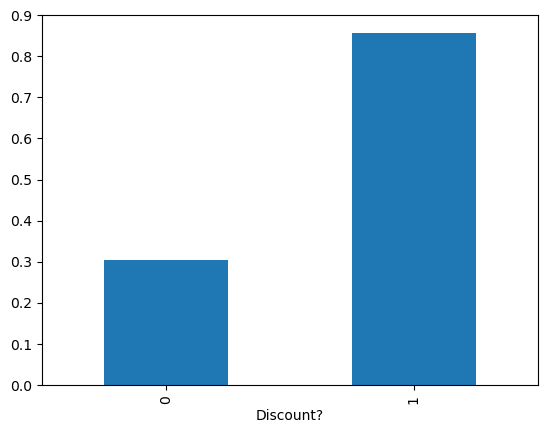

In [83]:
customer_data.groupby('Discount?')['Cancelled'].mean().plot.bar()

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [85]:
# Split the ID in the audio data so the column can be joined with other tables
audio_clean = pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type', 1:'Audio ID'})
audio_clean.head()

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [86]:
audio_all = pd.concat([audio_clean,audio], axis=1)
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [88]:
# Hint: Check the data type of Audio ID in the audio table
audio_all['Audio ID'] = audio_all['Audio ID'].astype('int')
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [89]:
df= listening_history.merge(audio_all, how='left', on='Audio ID')

In [90]:
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


<Axes: ylabel='Frequency'>

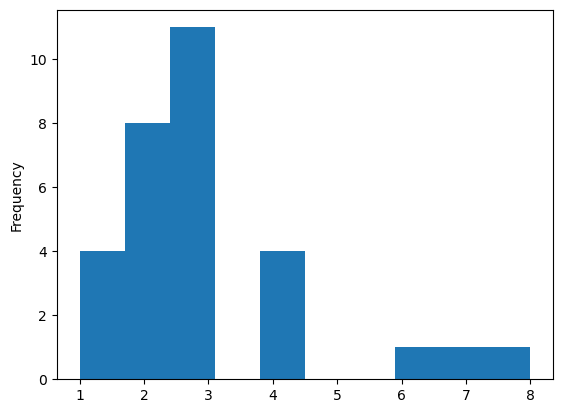

In [95]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [97]:
# The most popular genres that customers listened to
df['Genre'].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [98]:
# Create a dataframe ready for modeling
model_df = customer_data[['Customer ID', 'Cancelled', 'Discount?']]

In [99]:
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [100]:
# Calculate the number of listening sessions for each customer
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [101]:
number_of_sessions = df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()

In [102]:
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [103]:
model_df = model_df.merge(number_of_sessions, how='left', on = 'Customer ID')

In [104]:
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [107]:
pd.get_dummies(df.Genre, dtype=int)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [108]:
genres = pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis=1).groupby('Customer ID').sum().reset_index()


In [109]:
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [110]:
total_audio = listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()

In [111]:
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [112]:
#MASTER AUDIO TABLE
master_audio = genres.merge(total_audio, how='left', on='Customer ID')

In [113]:
master_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [121]:
# Percent pop
master_audio['Pop Percent'] = (master_audio['Pop'] / master_audio['Total Audio']) * 100 

In [130]:
model_df['Pop Percent'] = (master_audio['Pop'] / master_audio['Total Audio']) * 100 

In [122]:
master_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio,Pop Percent
0,5001,0,0,26,0,34,0,60,56.666667
1,5002,0,22,0,0,0,0,22,0.000000
2,5004,0,0,0,0,9,0,9,100.000000
3,5267,0,0,22,0,23,0,45,51.111111
4,5338,0,18,0,0,0,0,18,0.000000


In [123]:
# Percent podcasts
master_audio['Podcast Percent'] = ((master_audio['True Crime'] + master_audio['Comedy']) / (master_audio['Total Audio'])) *100

In [129]:
model_df['´Podcast Percent'] = ((master_audio['True Crime'] + master_audio['Comedy']) / (master_audio['Total Audio'])) *100

In [125]:
master_audio.head(20)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio,Pop Percent,Podcast Percent
0,5001,0,0,26,0,34,0,60,56.666667,0.000000
1,5002,0,22,0,0,0,0,22,0.000000,0.000000
2,5004,0,0,0,0,9,0,9,100.000000,0.000000
3,5267,0,0,22,0,23,0,45,51.111111,0.000000
4,5338,0,18,0,0,0,0,18,0.000000,0.000000
5,5404,0,0,0,0,8,0,8,100.000000,0.000000
6,5581,0,0,0,0,0,5,5,0.000000,100.000000
7,5759,0,0,0,0,15,0,15,100.000000,0.000000
8,5761,0,0,0,0,0,5,5,0.000000,100.000000
9,5763,0,0,11,0,20,0,31,64.516129,0.000000


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [126]:
import seaborn as sns

D:\Programas\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


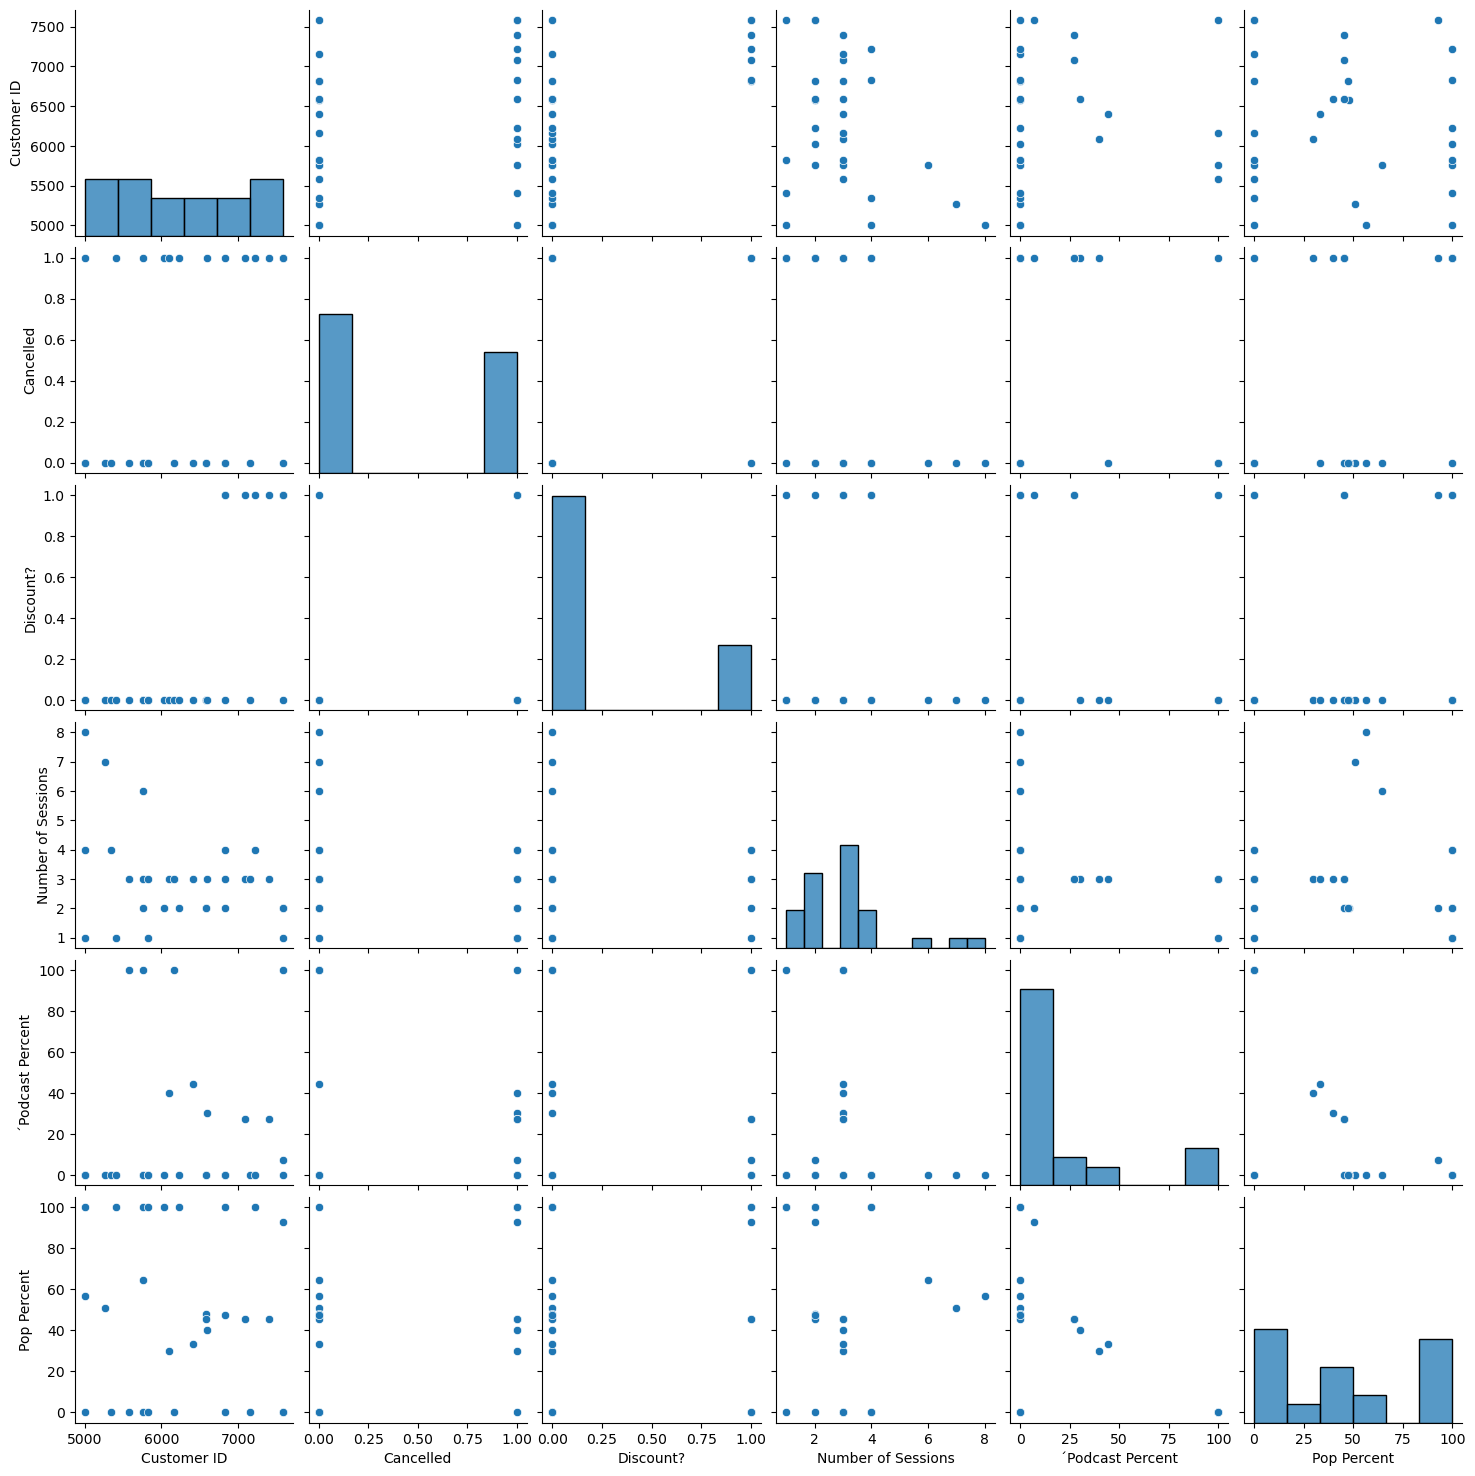

In [131]:
sns.pairplot(model_df)

In [132]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,´Podcast Percent,Pop Percent
Customer ID,1.000000,0.269942,0.648514,-0.337083,0.083083,-0.076129
Cancelled,0.269942,1.000000,0.471825,-0.333739,-0.035414,0.585630
Discount?,0.648514,0.471825,1.000000,-0.048877,0.062938,0.112675
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.125459,-0.131156
´Podcast Percent,0.083083,-0.035414,0.062938,-0.125459,1.000000,-0.487193
Pop Percent,-0.076129,0.585630,0.112675,-0.131156,-0.487193,1.000000


## OBSERVATION

- DISCOUNT IS CORRELATE A CANCELLATION
- MORE POP MUSIC, MORE CANCELLATIONS
- PODCAST NOT RELATED WITH CANCELLATION